In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio
import matplotlib.pyplot as plt

import os

In [7]:
tf.__version__


'2.4.1'

In [129]:
# cd into project directory
proj_path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace'   # ---------------> Define path please!!!
os.chdir(proj_path)
train_dir = proj_path + '/training'
test_dir = proj_path + '/testing'

# loading in dir paths for training and testing folders within project
folders_in = os.listdir()

training_mine_dir = train_dir + '/' + 'mine_img'    # dir training class = 1
training_notmine_dir = train_dir + '/' + 'not_mine_img'   # dir training class = 0

testing_mine_dir = test_dir + '/' + 'mine_img'      # dir testing class = 1
testing_notmine_dir = test_dir + '/' + 'not_mine_img'     # dir testing class = 0


# checking if final paths actually exist
if not os.path.isdir(training_mine_dir):
    print(training_mine_dir,'   --------- > is not a directory!!!')
    
elif not os.path.isdir(training_notmine_dir):
    print(training_notmine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_mine_dir):
    print(testing_mine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_notmine_dir):
    print(testing_notmine_dir,'   --------- > is not a directory!!!')
    
    
    

In [130]:
# defining training and testing ImageDataGenerators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10
                                                       )

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=10
                                                       )


# defining training and testing generators from ImageDataGenerator objects
train_generator = train_datagen.flow_from_directory( train_dir,
                                                     batch_size = 4,
                                                     class_mode = 'binary',
                                                     #color_mode = 'grayscale',
                                                     target_size = (50,50), 
                                                                           )

test_generator = test_datagen.flow_from_directory( test_dir,
                                                   batch_size = 4,
                                                   class_mode = 'binary',
                                                   #color_mode = 'grayscale',
                                                   target_size = (50,50),
                                                                           ) 


Found 9 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [131]:
# writing CNN architecture

model = tf.keras.models.Sequential([
        # first layer
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (50,50,1)),  # 1st Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 1st Max Pooling
    
        # second layer
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),  # 2nd Convolution 
        tf.keras.layers.MaxPooling2D(2,2),  # 2nd Max Pooling
    
        # third layer
        tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),  # 3rd Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 3rd Max Pooling
    
        # flat
        tf.keras.layers.Flatten(),
        
        # Dense
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
])


# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['acc'])



# The loss function that will be used = binary cross entropy
LOSS = 'binary_cross_entropy'
model.summary()


#from PIL import Image
import scipy
history = model.fit_generator(train_generator,
                            validation_data = test_generator,
                            steps_per_epoch = 10,
                            epochs = 30,
                            #validation_steps = 50,
                            #callbacks = [callbacks],
                            verbose = 2)# Your Code Here (set e

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 128)       65664     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)             

/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1839: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f00ac5f64f0>

In [132]:
mine_path


'/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace/training/mine_img/mine__2.tif'

In [2]:
### Opening raster and extracting np.array

def get_array(path):

    rast = rio.open(path)
    image = rast.read()
    rast.close()
    
    return image

# paths for a function
mine_test = os.listdir(proj_path + '/' + 'training' + '/' + 'mine_img')[0]    # path to a single mine for testing purposes
mine_path = proj_path + '/' + 'training' + '/' + 'mine_img' + '/' +str(mine_test)    # could be any image!!!

# mine np.array
mine = get_array(mine_path)



# looking at mine across all PC bands
def pc_plotter(array,color,pc):
    # array must be a 3-D array of dim [2,:,:]
    # color must be a string of accepted seaborn cmap colors 'gray', 'turbo', 'seismic', etc.
    # must be integer 1-3 to call which PC to plot, or string 'all' for PC1-3 plots.
    
    if pc == 'all':
        # Heatmap of PC-1
        sns.heatmap(array[0,:,:], cmap = color)
        plt.title('PC-1', fontsize = 20)
        plt.show()

        # Heatmap of PC-2
        sns.heatmap(array[1,:,:], cmap = color)
        plt.title('PC-2', fontsize = 20)
        plt.show()

        # Heatmap of PC-3
        sns.heatmap(array[2,:,:], cmap = color)
        plt.title('PC-3', fontsize = 20)
        plt.show()
        
    else:
        sns.heatmap(array[int(pc-1),:,:], cmap = color)
        plt.title('PC'+ str(pc), fontsize = 20)
        plt.show()
        
        
    
    

In [31]:
# current data type is float64. We need these arrays to be 8-bits for tensorflow. Therefore quantize or lowering precision is needed.
#mine.dtype

# first we must split the arrays along R,G,B channels to best visualize process

#### Method 1) Kmeans



#get_array('fdsa')

color = 'gray'



In [395]:
image = mine

rows = image.shape[1]
cols = image.shape[2]
  
image = image.reshape(image.shape[2]*image.shape[1],3)
kmeans = KMeans(n_clusters = 255, n_init=20, max_iter=200)
kmeans.fit(image)
 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8)  
labels = labels.reshape(rows,cols)

<AxesSubplot:>

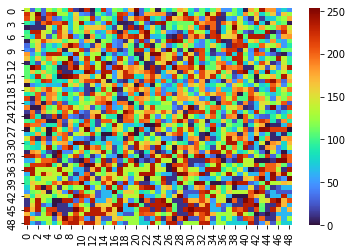

In [396]:
sns.heatmap(labels,cmap='turbo')

In [397]:
centers = clusters
c_image = labels
 
image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8)
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

In [401]:
image.shape

(49, 49, 3)

<AxesSubplot:>

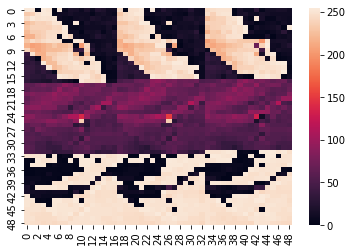

In [402]:
sns.heatmap(image[:,:,0])


In [217]:
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import KMeans

# first we must split the arrays along R,G,B channels to best visualize process

#### Method 1) Kmeans
red = mine[0,:,:]
green = mine[1,:,:]
blue = mine[2,:,:]


def kmeans_compressor(arr_float64):
    pass

max_dim = max(mine.shape)


R_kmeans = KMeans(n_clusters = 49,init='k-means++')

red_cmprs = R_kmeans.fit(mine)
###
cmprs_image = red_cmprs.labels_.astype('int8')
clusters = np.asarray(R_kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(R_kmeans.labels_,dtype=np.uint8 )

sns.heatmap(clusters)
###
centers = labels
c_image = clusters
 
image = np.zeros((c_image.shape[0],c_image.shape[1],0),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]

ValueError: Found array with dim 3. Estimator expected <= 2.

<AxesSubplot:>

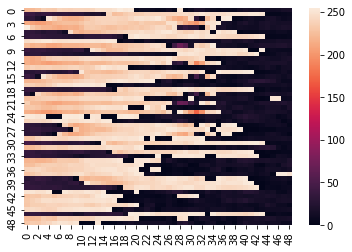

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

49

In [4]:
### QUANTIZE

# this function will transform a numpy array into a tensorflow tensor object and quantize it!
def quantizer(np_array):
    
    
    # must be a numpy array of any dtype but will be converted to float32
    tensor = tf.convert_to_tensor(
        
                        value = np_array,
                        dtype=tf.float32,
                        #dtype_hint=None,
                        #name=None
    )

    
    
    quantized_tensor = tf.quantization.quantize(
        
                        input = tensor,
                        min_range = np_array.min(), 
                        max_range = np_array.max(), 
                        T = tf.qint8, 
                        mode='SCALED',
                        #round_mode='HALF_AWAY_FROM_ZERO', 
                        #name=None, 
                        #narrow_range=False,
                        #axis=None, 
                        ensure_minimum_range=0.00
    )

        
    
    return quantized_tensor



In [463]:
quant = tf.quantization.quantize(
    input = mine_tf,
    min_range = mine.min(), 
    max_range = mine.max(), 
    T = tf.qint8, 
    mode='SCALED',
    #round_mode='HALF_AWAY_FROM_ZERO', 
    #name=None, 
    #narrow_range=False,
    #axis=None, 
    ensure_minimum_range=0.00
)


AttributeError: 'QuantizeV2' object has no attribute 'asarray'

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [464]:
type(quant[0])

tensorflow.python.framework.ops.EagerTensor

AttributeError: 'QuantizeV2' object has no attribute 'tensor_shape'

In [467]:
butt= quant[0].numpy()
sns.heatmap(butt[1,:,:],)
sns.heatmap(mine[1,:,:])

# Now we quantize the whole TM PCA image!


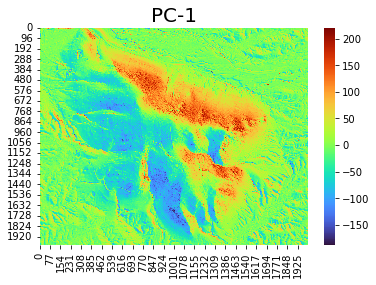

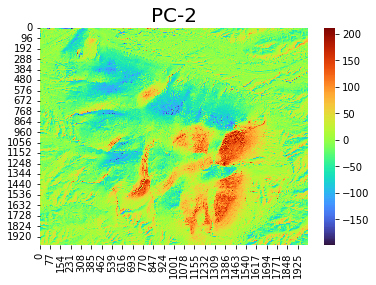

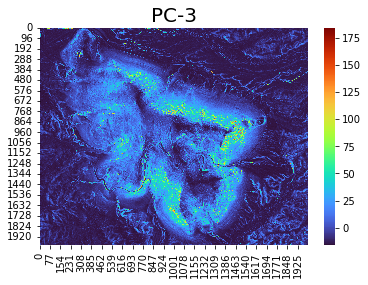

dtype is:  <class 'numpy.dtype[float64]'>
Number of unique values in PC1:  169135


In [5]:
# first import the Gtiff using rasterio and predefined get_array function
TM_pca = get_array('/home/jmm688/Tensorflow/TM_cnn_project/workspace/GIS_data/PCA/PCA_HS.tif')   # Path 

# visualize all PC's with pc_plotter(array,color,pc) function
pc_plotter(TM_pca,'turbo','all') # 'all' will show each PC in TM_pca array

print('dtype is: ',type(TM_pca.dtype)) # ----------> notice how this is a numpy array float67! we want a tensor qint8 !
print('Number of unique values in PC1: ',np.unique(TM_pca[0,:,:]).shape[0])  # -------> just one band contains 169135 values! we need to preprocess and get no more than 256 (8bit) values!




To sumarize... Above we notice that our gtiff image is actually encoded in 64bit color image. This is possible due to GDAL's gtiff driver! It can write images with DN values with a range in at high precision.


Unfortunatey Tensorflow image recognition API does not support geotiff file types. This can be seen from the previous error raised from model.fit()
''cannot identify image file <_io.BytesIO object at 0x7f00ac5f64f0>''


In adition PIL software cannot write regular tiffs with non 8bit integer data types. This makes sense because most images can be perfectly described using R,G,B values ranging (0-255). Plus! camera hardware most likely suport 8bit data.


But this isnt the case for most satelite images. In fact most images are encoded in 8, 16, 32 bits!
... which is why GDAL gtiff supports 8-64bit datatypes.

In [6]:
# Next step... we quantize the entire PCA image using the quantizer(np_array) function
TM_quantized = quantizer(TM_pca)

type(TM_quantized) # ----> tf.quantization.quantize() returns QuantizeV2 object which a tuple where...

# QuantizeV2[0].numpy() returns a numpy array of quantized tensor
# QuantizeV2[1] returns the min value
# QuantizeV2[2] returns the max value



Instructions for updating:
`tf.quantize_v2` is deprecated, please use `tf.quantization.quantize` instead.


2021-09-21 15:06:14.835813: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow.python.ops.gen_array_ops.QuantizeV2

In [7]:
print(TM_quantized[1], '-----> This is min')
print(TM_quantized[2], '-----> This is max')
print()
print()
print(TM_quantized[0].numpy(),'-----> New quantized array!!!')

tf.Tensor(-222.00638, shape=(), dtype=float32) -----> This is min
tf.Tensor(220.27196, shape=(), dtype=float32) -----> This is max


[[[ 10  11   7 ...   6   7   6]
  [  9   7   6 ...   7   7   7]
  [ 11   8   6 ...   9  12  10]
  ...
  [-38 -28 -22 ...   5   8  12]
  [-37 -29 -24 ...   6  12  14]
  [-36 -28 -25 ...   7  11  10]]

 [[  6   2  -3 ... -11 -12 -13]
  [  5   3   1 ... -14 -14 -13]
  [  4   1   2 ... -18 -17 -17]
  ...
  [ -8  -1   1 ...   0   9  21]
  [ -8  -3  -1 ...   4  16  19]
  [-11  -5  -2 ...  13  21  16]]

 [[ -9  -9  -9 ...  -8  -7  -7]
  [ -9  -9  -9 ...  -8  -7  -7]
  [ -9  -9  -9 ...  -7  -7  -7]
  ...
  [  3  -1  -4 ...  -9  -9  -8]
  [  3  -1  -3 ...  -9  -9  -8]
  [  3  -2  -3 ...  -8  -7  -8]]] -----> New quantized array!!!


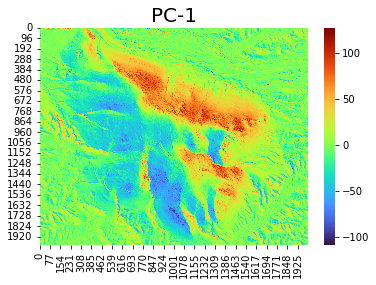

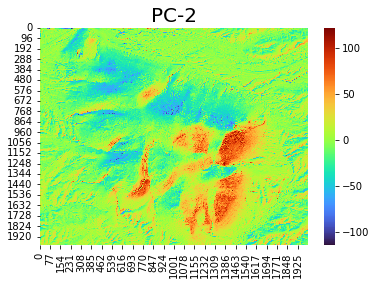

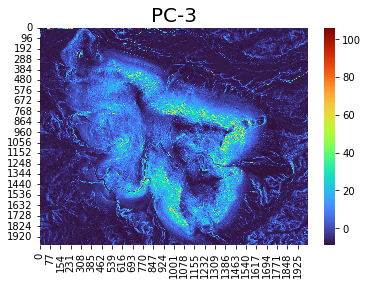

In [8]:
# lets vizualize all new PC images that have been quantized
TM_quant = TM_quantized[0].numpy()

pc_plotter(TM_quant,'turbo','all')

Text(0.5, 1.0, 'PC-3 Quantized')

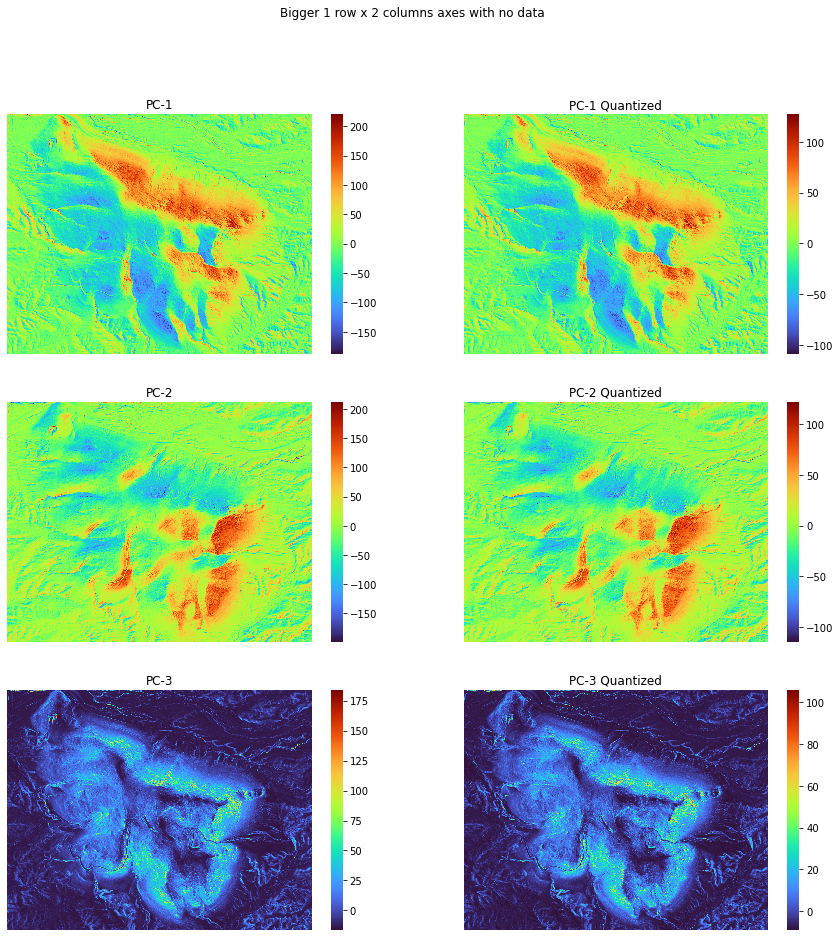

In [26]:
# lets observe the quant PC and the regular PC side by side
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')

color = 'turbo'  # -----> define color map

### PC-1
sns.heatmap(TM_pca[0,:,:], cmap=color, ax=axes[0][0],xticklabels=False,yticklabels=False)
axes[0][0].set_title('PC-1')
sns.heatmap(TM_quant[0,:,:], cmap=color, ax=axes[0][1],xticklabels=False,yticklabels=False)
axes[0][1].set_title('PC-1 Quantized')


### PC-2
sns.heatmap(TM_pca[1,:,:], cmap=color, ax=axes[1][0],xticklabels=False,yticklabels=False)
axes[1][0].set_title('PC-2')
sns.heatmap(TM_quant[1,:,:], cmap=color, ax=axes[1][1],xticklabels=False,yticklabels=False)
axes[1][1].set_title('PC-2 Quantized')


### PC-3
sns.heatmap(TM_pca[2,:,:], cmap=color, ax=axes[2][0],xticklabels=False,yticklabels=False)
axes[2][0].set_title('PC-3')
sns.heatmap(TM_quant[2,:,:], cmap=color, ax=axes[2][1],xticklabels=False,yticklabels=False)
axes[2][1].set_title('PC-3 Quantized')




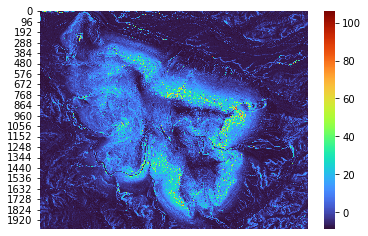

In [33]:
sns.heatmap(TM_quant[2,:,:], cmap=color,xticklabels=False)
plt.savefig("output_q.png",dpi=800)

In [28]:
os.getcwd()

'/home/jmm688/Downloads'